In [13]:
import pandas as pd
data = pd.read_json('modcloth_final_data.json', lines=True)
data.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [15]:
#menampilkan informasi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [16]:
#menampilkan kolom
data.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [17]:
data.columns=["item_id", "waist", "size", "quality", "cup_size", "hips", "bra_size",
       "category", "bust", "height", "user_name", "length", "fit", "user_id",
       "shoe_size", "shoe_width", "review_summary", "review_text"]

In [18]:
#missing value percentage per column
missing_data = pd.DataFrame({'total_missing':data.isnull().sum(), 'perc_missing':(data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [19]:
#univariate
data.describe()

,item_id,waist,size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


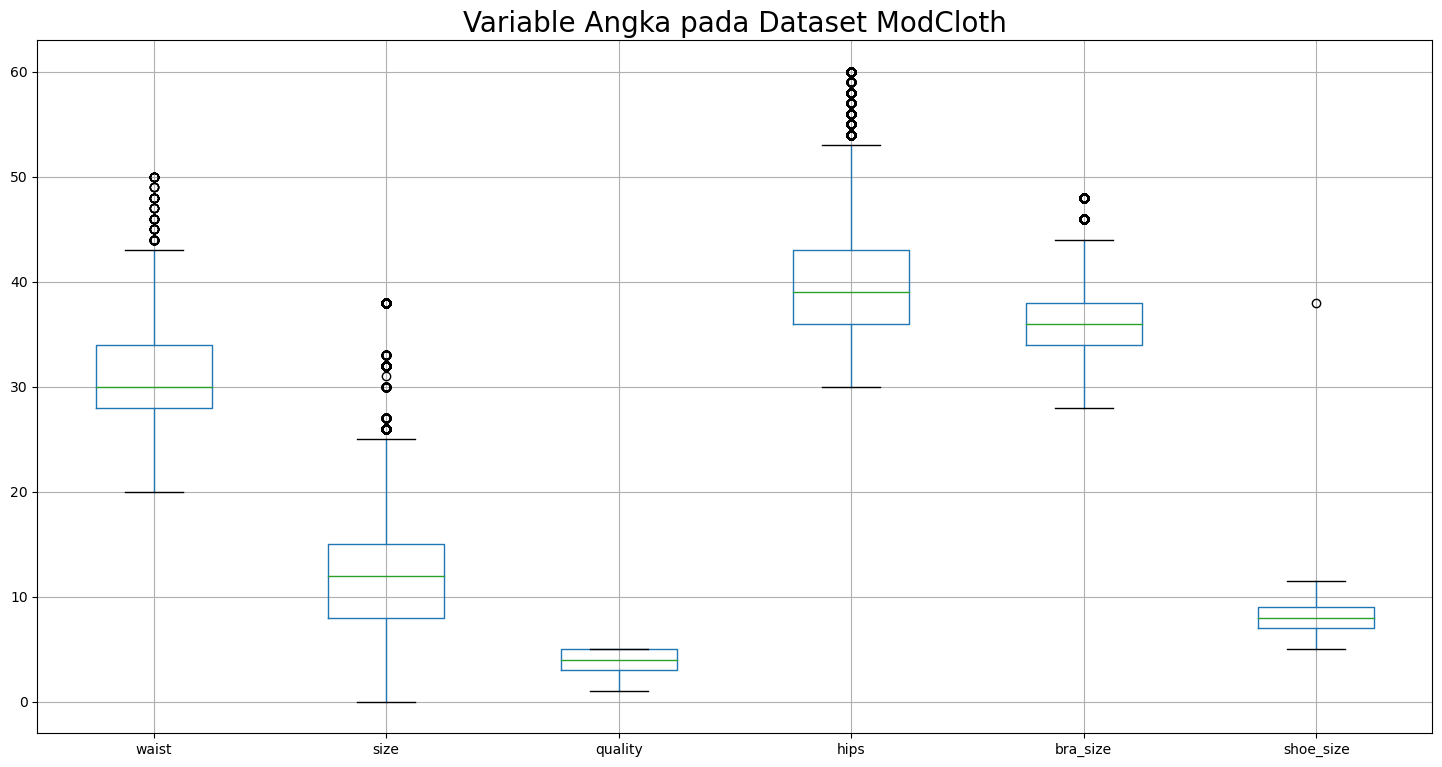

In [20]:
import matplotlib.pyplot as plt

num_cols = ['waist', 'size', 'quality', 'hips', 'bra_size', 'shoe_size']
plt.figure(figsize=(18,9)) #size dari gambar
data[num_cols].boxplot() #ploting boxplot
plt.title('Variable Angka pada Dataset ModCloth', fontsize = 20)
plt.show()

In [21]:
data[data.shoe_size == 38]

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [22]:
data.at[37313, 'shoe_size']=None #untuk set nilai

In [23]:
data.iloc[37313,:] #untuk mencari value

item_id                                                      416942
waist                                                          35.0
size                                                             12
quality                                                         5.0
cup_size                                                          d
hips                                                           46.0
bra_size                                                       36.0
category                                                        new
bust                                                          37-39
height                                                      5ft 5in
user_name                                                Catslittle
length                                                   just right
fit                                                             fit
user_id                                                      237498
shoe_size                                       

In [25]:
#cek jumlah value dari outlier per column
data.sort_values(by=['bra_size'],ascending=False).head(10)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


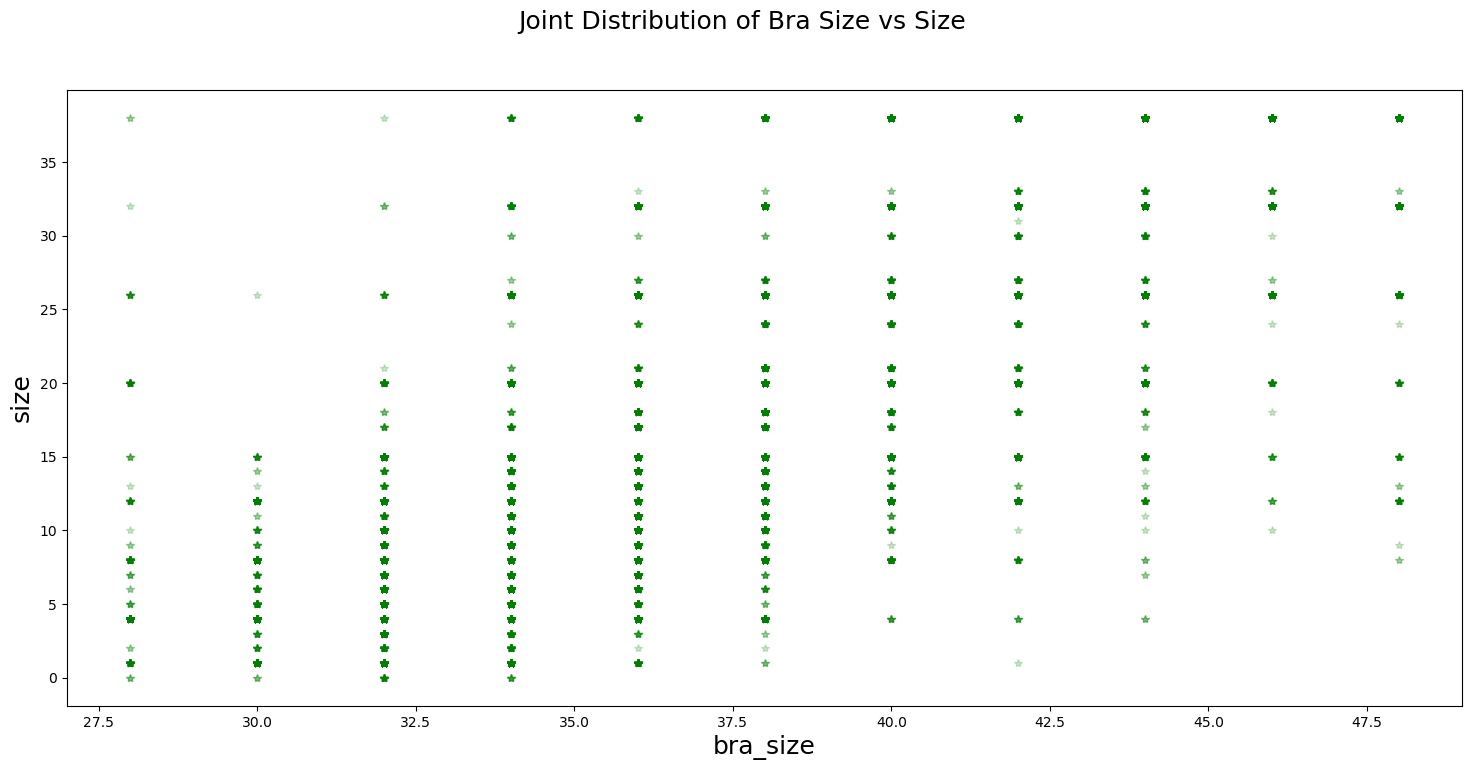

In [26]:
plt.figure(figsize=(18,8))
plt.xlabel('bra_size', fontsize=18)
plt.ylabel('size', fontsize=18)
plt.suptitle("Joint Distribution of Bra Size vs Size", fontsize=18)
plt.plot(data.bra_size,data['size'],'g*',alpha=0.2)
plt.show()

In [2]:
#Initial plot

def plot_dist(col,ax):
    data[col][data[col].notnull()].value_counts().plot(kind='bar',facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col),fontsize=20)
    ax.set_title('{} pada Dataset ModCloth'.format(col),fontsize=18)
    return ax

f,ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9,w_pad=2,rect=[0,0.03,1,0.93])
cols=['bra_size', 'bust', 'catagory', 'cup_size', 'fit', 'height', 'hips', 'lenght', 'quality']
k=0

for i in range(3):
    for j in range(3):
        plot_dist(cols[k],ax[i][j])
        k +=1

__ = plt.suptitle("Distribusi Awal dari Features", fontsize=20)

NameError: name 'plt' is not defined

In [28]:
data.bra_size = data.bra_size.fillna('Unknown')
data.bra_size = data.bra_size.astype('category').cat.as_ordered()
data.at[37313, 'bust'] ='38'
data.bust=data.bust.fillna(0).astype(int)
data.category=data.category.astype('category')

In [29]:
data.cup_size.fillna('Unknown', inplace=true)
data.cup_size = data.cup_size.astype('category').cat.as_ordered()

data.fit=data.type('category')

NameError: name 'true' is not defined

In [39]:
#conversi height satuannya ft ke cm
def get_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[0]*30.48)+(int(x[4:-2])*2.54)
    except:
        return (int(x[0]))*30.48

data.height = data.height.apply(get_cms)

SyntaxError: '(' was never closed (3315360696.py, line 6)

In [35]:
#cek konversi
data['height'].head(20)

0     (150, 48)
1     (150, 48)
2     (150, 48)
3          None
4     (150, 48)
5     (150, 48)
6     (150, 48)
7     (150, 48)
8     (150, 48)
9     (150, 48)
10    (150, 48)
11    (150, 48)
12    (150, 48)
13    (150, 48)
14    (150, 48)
15    (150, 48)
16    (150, 48)
17         None
18    (150, 48)
19    (150, 48)
Name: height, dtype: object

In [ ]:
print(data[((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) & (data.shoe_size.isnull()) & (data.waist.isnull())].head(3))

In [ ]:
print(data[((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) &(data.hips.notnull()) & (data.shoe_size.notnull()) | (data.shoe_width.notnull()) &(data.waist.isnull())].head(3))

In [ ]:
print(data[((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) & ((data.hips.notnull()) & (data.shoe_size.notnull()) | (data.shoe_width.notnull()) &(data.waist.isnull())].head(3))

In [ ]:
#make variabel pakaian dalam
pakaian_dalam = print(data[((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) &(data.hips.isnull()) & (data.shoe_size.notnull()) | (data.shoe_width.notnull()) &(data.waist.isnull())].head(3))

In [ ]:
#make vareable shoes
sepatu = print(data[((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) &(data.hips.isnull()) & (data.shoe_size.notnull()) | (data.shoe_width.notnull()) &(data.waist.isnull())].head(3))

In [ ]:
#make variabel clothes
pakaian = print(data[((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) &(data.hips.isnull()) & (data.shoe_size.notnull()) | (data.shoe_width.notnull()) &(data.waist.isnull())].head(3))

In [ ]:
data['fisrt_time_user'] = [pakaian_dalam | sepatu | pakaian]
print('kolom baru berhasil ditambah')
print('kolom transaksi oleh pembeli pertama yang membeli 3 item itu ' + str(sum(data.first_time_user)))
print('total pengguna pembeli pertama' + str(len(data[pakaian_dalam | sepatu | pakaian)]))